In [1]:
from __future__ import print_function  #for compatibility beteen python2 and python3
__author__ = "Shivam Kumar Pathak - skp454, CUSP NYU 2018"

In [2]:
# Import useful libraries
import os
import sys
import pandas as pd 
import matplotlib.pylab as plt

%matplotlib inline

## Drinking Water Quality Distribution and Monitoring

The data for this is available at NYC OPEN DATA.

### Solution1: Direct download using URL

The url to download this data in csv: https://data.cityofnewyork.us/api/views/bkwf-xfky/rows.csv?accessType=DOWNLOAD

In [3]:
# Download data from above url to 'annualwaternyc.csv'
!curl https://data.cityofnewyork.us/api/views/bkwf-xfky/rows.csv?accessType=DOWNLOAD > drinkingwaterquality.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6404k    0 6404k    0     0  2391k      0 --:--:--  0:00:02 --:--:-- 2391k


In [4]:
# Checking the availability of env variable 'PUIDATA'
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/skp454/PUIdata


In [5]:
# Create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/skp454/PUIdata


In [6]:
# Move the data to PUIdata directory
!mv drinkingwaterquality.csv $PUIDATA

In [7]:
#test if the data is there
!ls $PUIDATA

drinkingwaterquality.csv


In [8]:
# Import data from csv to pandas dataframe
df_dwQuality = pd.read_csv("%s/drinkingwaterquality.csv"%os.getenv("PUIDATA")) 

In [9]:
# First 7 rows of dataframe
df_dwQuality.head(7)

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Location,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,NaN,01/01/2015,12:19,1S07,Operational,SS - Shaft 7 of City Tunnel No. 1 - W/S Sedgwi...,0.58,0.96,0.79,<1,<1
1,NaN,01/01/2015,11:15,1S04,Operational,SS - Shaft 4 of City Tunnel No.1 - IFO 2780 Re...,0.71,0.94,0.80,<1,<1
2,NaN,01/01/2015,10:09,1S03A,Operational,SS - Shaft 3A of City Tunnel No. 2 - IFO 823 S...,0.79,0.93,0.79,<1,<1
3,NaN,01/01/2015,10:41,1S03B,Operational,SS - Shaft 3B of City Tunnel No. 3 - Mosholu A...,0.77,0.93,0.80,<1,<1
4,NaN,01/01/2015,09:38,11550,Compliance,"SS - IFO 1058 S/S E Gun Hill Rd, 1st SS E/O Ho...",0.74,0.95,NaN,<1,<1
5,NaN,01/01/2015,08:41,13850,Compliance,"SS - IFO 1778 E/S Jerome Ave, 1st SS S/O E 176...",0.59,1.08,NaN,<1,<1
6,NaN,01/01/2015,09:07,15550,Compliance,"SS - IFO 2499 W/S Grand Ave, 1st SS S/O W 190t...",0.54,0.90,NaN,<1,<1


In [10]:
# Truncating the dataframe to keep only useful columns for plotting
# As the dataframe has data for many sites, we are keeping only those rows which are for Site No.1S04 
df_dwQualityTruncated=df_dwQuality.loc[df_dwQuality["Sample Site"]==' 1S04',["Residual Free Chlorine (mg/L)","Turbidity (NTU)"]]

In [11]:
# Top 7 rows of the new truncated dataframe
df_dwQualityTruncated.head(7)

,Residual Free Chlorine (mg/L),Turbidity (NTU)
1,0.71,0.94
36,0.66,0.99
80,0.57,1.10
114,0.68,1.12
149,0.74,1.01
193,0.70,1.08
263,0.81,1.21


Text(0.5,1,'Drinking Water Quality at Site No. 1S04')

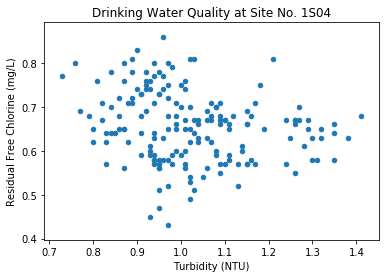

In [12]:
# Plotting water usage of NYC over years
df_dwQualityTruncated.plot(y="Residual Free Chlorine (mg/L)", x="Turbidity (NTU)", kind='scatter')
plt.title('Drinking Water Quality at Site No. 1S04')

#### Drinking Water Quality at Site No. 1S04
1. The above plots shows the relation of Turbidity(NTU) with Residual Free Chlorine(mg/L) at Grand Avenue.

2. This plot is important to understand the effect of Turbidity on Residual Free Chlorine . 

3. There is no general relation between Turbidity and Residual Free Chlorine at Site No. 1S04.  

### Solution 2: Use API and download a json file


In [13]:
# URl for downloading JSON from SODA API
url = 'https://data.cityofnewyork.us/resource/xehj-c7r8.json'

In [14]:
# Downloading data from URL and storing in a dataframe
df_dwQuality2 = pd.read_json(url)

In [15]:
# The first 8 rows of the data
df_dwQuality2.head(8)

,coliform_quanti_tray_mpn_100ml,e_coli_quanti_tray_mpn_100ml,fluoride_mg_l,location,residual_free_chlorine_mg_l,sample_class,sample_date,sample_site,sample_time,turbidity_ntu
0,<1,<1,0.79,SS - Shaft 7 of City Tunnel No. 1 - W/S Sedgwi...,0.58,Operational,2015-01-01T00:00:00.000,1S07,2018-09-26 12:19:00,0.96
1,<1,<1,0.80,SS - Shaft 4 of City Tunnel No.1 - IFO 2780 Re...,0.71,Operational,2015-01-01T00:00:00.000,1S04,2018-09-26 11:15:00,0.94
2,<1,<1,0.79,SS - Shaft 3A of City Tunnel No. 2 - IFO 823 S...,0.79,Operational,2015-01-01T00:00:00.000,1S03A,2018-09-26 10:09:00,0.93
3,<1,<1,0.80,SS - Shaft 3B of City Tunnel No. 3 - Mosholu A...,0.77,Operational,2015-01-01T00:00:00.000,1S03B,2018-09-26 10:41:00,0.93
4,<1,<1,NaN,"SS - IFO 1058 S/S E Gun Hill Rd, 1st SS E/O Ho...",0.74,Compliance,2015-01-01T00:00:00.000,11550,2018-09-26 09:38:00,0.95
5,<1,<1,NaN,"SS - IFO 1778 E/S Jerome Ave, 1st SS S/O E 176...",0.59,Compliance,2015-01-01T00:00:00.000,13850,2018-09-26 08:41:00,1.08
6,<1,<1,NaN,"SS - IFO 2499 W/S Grand Ave, 1st SS S/O W 190t...",0.54,Compliance,2015-01-01T00:00:00.000,15550,2018-09-26 09:07:00,0.90
7,<1,<1,NaN,"SS - IFO 309 N/S E 149th St, 2nd SS W/O Courtl...",0.56,Compliance,2015-01-01T00:00:00.000,17550,2018-09-26 11:16:00,1.00


In [16]:
# Truncating the dataframe to keep only useful columns for plotting
# As the dataframe has data for many sites, we are keeping only those rows which are for Site No.1S04 
df_dwQuality2Truncated=df_dwQuality2.loc[df_dwQuality2['sample_site']==' 1S07',['sample_date','residual_free_chlorine_mg_l','turbidity_ntu']]

In [17]:
# Changing the format of sample_date to Timestamp
df_dwQuality2Truncated['sample_date'] = df_dwQuality2Truncated['sample_date'].apply(lambda x: pd.Timestamp(x))

In [18]:
# Changing the column name to match with column names of earlier
df_dwQuality2Truncated.columns = ["Sample Date", "Residual Free Chlorine (mg/L)", "Turbidity (NTU)"]

In [19]:
# The first 8 rows of truncated data
df_dwQuality2Truncated.head(8)

,Sample Date,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,2015-01-01,0.58,0.96
35,2015-01-02,0.69,1.04
80,2015-01-03,0.74,1.08
116,2015-01-04,0.63,1.03
151,2015-01-05,0.59,1.27
194,2015-01-06,0.71,1.14
268,2015-01-07,0.65,1.16
306,2015-01-08,0.56,1.14


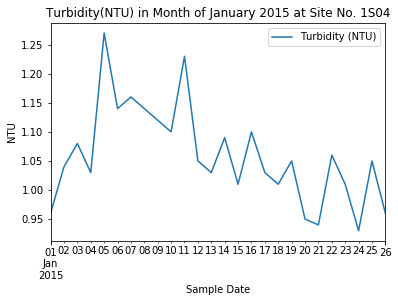

In [20]:
# Plotting Turbidity with Sample Date
plot = df_dwQuality2Truncated.plot(x='Sample Date', y='Turbidity (NTU)')
plot.set_ylabel("NTU");
plt.title('Turbidity(NTU) in Month of January 2015 at Site No. 1S04');

### Turbidity(NTU) in Month of January 2015 at Site No. 1S04

1. The plot shows turbidity in NTU for differnet dates of January-2015 at site no. 1S04
2. As seen in the plot, Turbidity peaks at few dates (05-Jan and 10-Jan) and overall it has gone down towards the ned of month

Text(0.5,1,'Residual Free Chlorine (mg/L) in Month of January 2015 at Site No. 1S04')

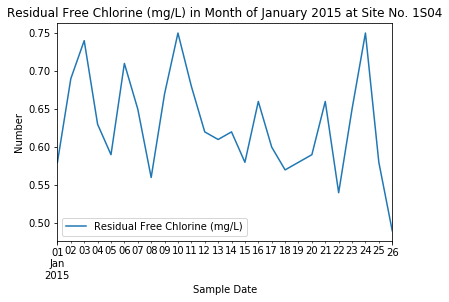

In [21]:
# Plotting Residual Free Chlorine with Sample Date
Plot2 = df_dwQuality2Truncated.plot(x="Sample Date", y="Residual Free Chlorine (mg/L)")
Plot2.set_ylabel("Number");
plt.title('Residual Free Chlorine (mg/L) in Month of January 2015 at Site No. 1S04')

### Residual Free Chlorine (mg/L) in Month of January 2015 at Site No. 1S04

1. The plot shows residual free chlorine in mg/L for differnet dates of January-2015 at site no. 1S04
2. As seen in the plot, residual free clorine has slight variation daywise and this variation was fairly low between 12 to 21 January.